Retrieve data from World Health Organization

In [16]:

import requests

url = "https://ghoapi.azureedge.net/api/HIV_0000000001"

response = requests.get(url)

data = response.json()

countries = []
years = []
rates = []

for item in data['value']:
    countries.append(item['SpatialDim'])
    years.append(item['TimeDim'])
    rates.append(item['NumericValue'])

Create DataFrame with Arrays

In [17]:
import pandas as pd

data = {'Country':countries, 'Year':years, 'Rate': rates}

df = pd.DataFrame(data)

initial_df = df[df['Country'] != 'GLOBAL']

print(initial_df)

     Country  Year        Rate
1        AFR  2021  25600000.0
2        AMR  2021   3800000.0
3        EMR  2021    430000.0
4        EUR  2021   2800000.0
5       SEAR  2021   3800000.0
...      ...   ...         ...
4487     VEN  2000     50000.0
4488     VNM  2000    120000.0
4489     YEM  2000      2200.0
4490     ZMB  2000    880000.0
4491     ZWE  2000   1600000.0

[4460 rows x 3 columns]


In [18]:
grouped_df = initial_df.groupby(['Year']).sum()
print(grouped_df)

            Rate
Year            
1990   8541000.0
1991  10482000.0
1992  12387000.0
1993  14553000.0
1994  16710000.0
1995  18648000.0
1996  20606000.0
1997  22245000.0
1998  23706000.0
1999  25077000.0
2000  49801960.0
2001  51132160.0
2002  52001260.0
2003  52872450.0
2004  53232750.0
2005  53696180.0
2006  54102610.0
2007  54845400.0
2008  55541950.0
2009  56555230.0
2010  58560730.0
2011  59754160.0
2012  60934960.0
2013  62139910.0
2014  63531930.0
2015  64741030.0
2016  65927530.0
2017  66989070.0
2018  68260060.0
2019  69395270.0
2020  69096860.0
2021  69761460.0


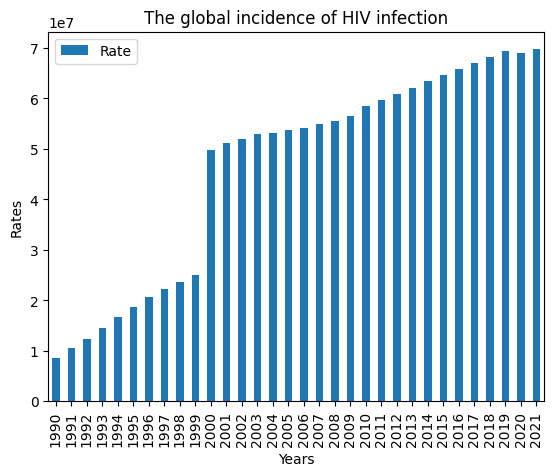

In [19]:
import matplotlib.pyplot as plt

new_df = grouped_df.reset_index()

new_df.plot(kind='bar',x='Year',y='Rate')

plt.xlabel('Years')
plt.ylabel('Rates')
plt.title('The global incidence of HIV infection')

plt.show()

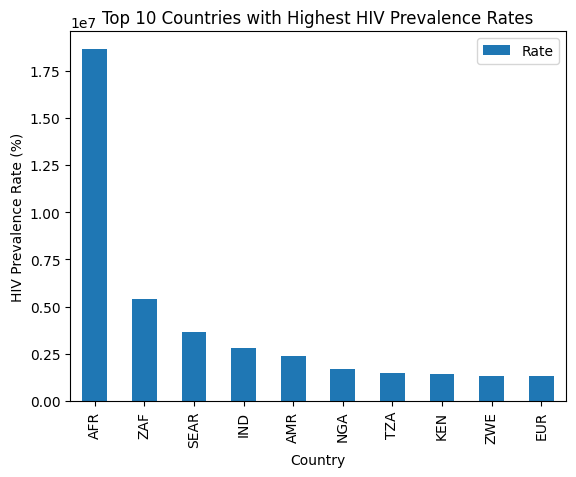

In [20]:
grouped_df = initial_df.groupby('Country').mean().sort_values(by='Rate', ascending=False)
top_10 = grouped_df.nlargest(10,'Rate')
top_10['Country'] = top_10.index

top_10.plot(kind='bar', x='Country', y='Rate')
plt.xlabel('Country')
plt.ylabel('HIV Prevalence Rate (%)')
plt.title('Top 10 Countries with Highest HIV Prevalence Rates')

plt.show()